In [1]:
from covid_lib import read_covid_data
import numpy as np
import matplotlib.pyplot as plt

from aidam.math_utils import lag_correlation_ext, moving_function_rev1
from scipy.stats import pearsonr
from aidam.aicharts import plotyy

## Lettura e preprocessing dati

In [2]:
trend,regioni,giorni,giorno_settimana,popolazione,day_counter=read_covid_data('stored_data.pkl')

Giorni osservati: 942
Primo giorno: 2020-02-24T18:00:00
Ultimo giorno: 2022-09-22T17:00:00


In [8]:
trend.keys()

dict_keys(['ricoverati_con_sintomi', 'terapia_intensiva', 'ingressi_terapia_intensiva', 'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi', 'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti', 'deceduti', 'totale_casi', 'tamponi', 'casi_da_sospetto_diagnostico', 'casi_da_screening', 'tamponi_giornalieri', 'casi_da_sospetto_diagnostico_giornalieri', 'casi_da_screening_giornalieri', 'deceduti_giornalieri', 'guariti_giornalieri', 'perc_tamponi_positivi', 'perc_guariti_su_positivi', 'perc_deceduti_su_positivi'])

## Calcolo LAG correlation

In [11]:
max_delay=50
delays=list(range(0,max_delay))

x_name_list = ['nuovi_positivi', 'perc_tamponi_positivi']
y_name='deceduti_giornalieri'


y=trend[y_name]['Italia']

y_sm=moving_function_rev1(y,np.mean,2,2)


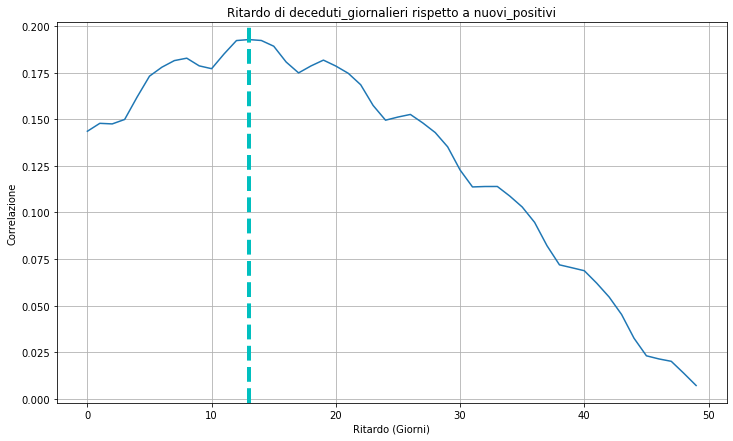

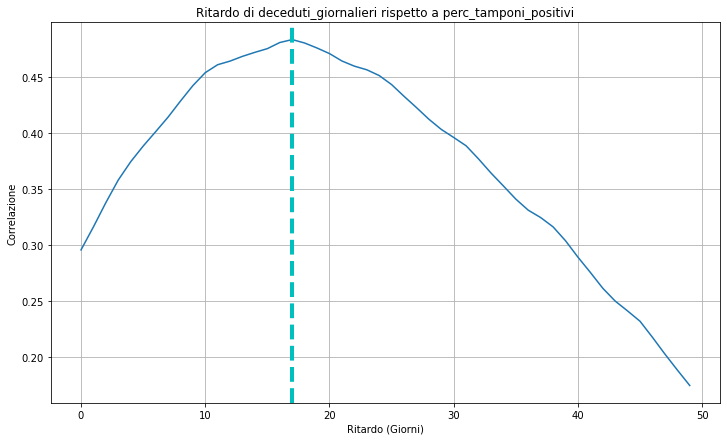

In [12]:
# giorni considerati nella analisi
days_analysis=90

for x_name in x_name_list:
    x=trend[x_name]['Italia']
    if x_name=='perc_tamponi_positivi':
        x[0]=x[1]
    corrs, betas = lag_correlation_ext(
        x, y_sm, delays, corr_fun=pearsonr)
    max_point=np.argmax(corrs)
    
    fig,ax=plt.subplots(1,figsize=(12,7))
    ax.plot(delays,corrs,label='Correlazione')
    ax.grid()
    ax.set_xlabel('Ritardo (Giorni)')
    ax.set_ylabel('Correlazione')
    ax.set_title('Ritardo di %s rispetto a %s'%(y_name,x_name))
    ax.axvline(x=max_point,c='c', linewidth=4,ls='--')
plt.show()


In [5]:
max_point

0